In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataframe = load_dataset('lukebarousse/data_jobs')

df = dataframe['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

import ast

import seaborn as sns

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\gnikh\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Jan 25 12:41:59 2025).


In [2]:
da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [8]:
data = da_us.dropna(subset='salary_year_avg')

data_ex = data.explode('job_skills')

total_jobs = len(data)

data_group = data_ex.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

data_group['percent'] = data_group['count']/total_jobs * 100

data_group = data_group[data_group['percent'] > 5]

data_group

,count,median,percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [24]:
from adjustText import adjust_text

from matplotlib.ticker import PercentFormatter

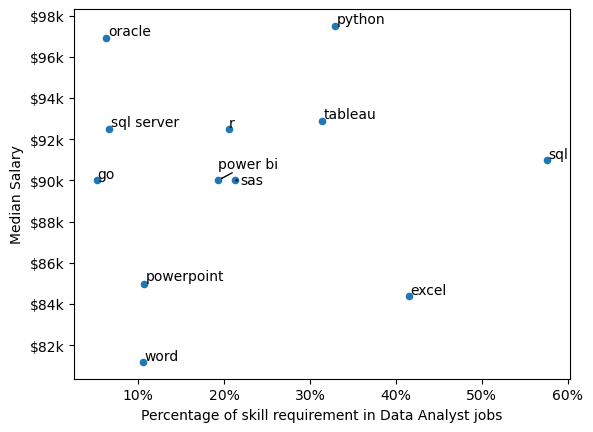

In [33]:
data_group.plot(kind='scatter', x='percent', y='median')

texts = []

for i, txt in enumerate(data_group.index):
    texts.append(plt.text(data_group['percent'].iloc[i], data_group['median'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.ylabel('Median Salary')
plt.xlabel('Percentage of skill requirement in Data Analyst jobs')

plt.show()